# Part 1) Data Review

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,NaN,63.0,0
764,2.0,122.0,70.0,NaN,0.0,36.8,0.340,NaN,0
765,5.0,NaN,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,NaN,0.0,30.1,0.349,NaN,1


### Question 1)

The Info method shows:
-     Range of index in dataframe
-     Number of columns in dataframe
-     Every column Name, Data Type and number of non-null elements in a column

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


The describe method shows:
-     Number of non-null elements in the column
-     Mean of the column
-     Std of the column
-     Min of the column
-     Max of the column

In [325]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


### Question 2)

In [326]:
missing = df[df.columns].isnull().sum()
missing

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64

In [327]:
missing[missing.gt(0)] / df.shape[0] * 100

Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
dtype: float64

### Question 3)

Pandas **corr** is used to find the pairwise correlation of all columns in the dataframe. Any NaN values are automatically excluded. 

A 2-D **Heatmap** from Matplotlib is a data visualization tool that helps to represent the magnitude of the phenomenon in form of colors.

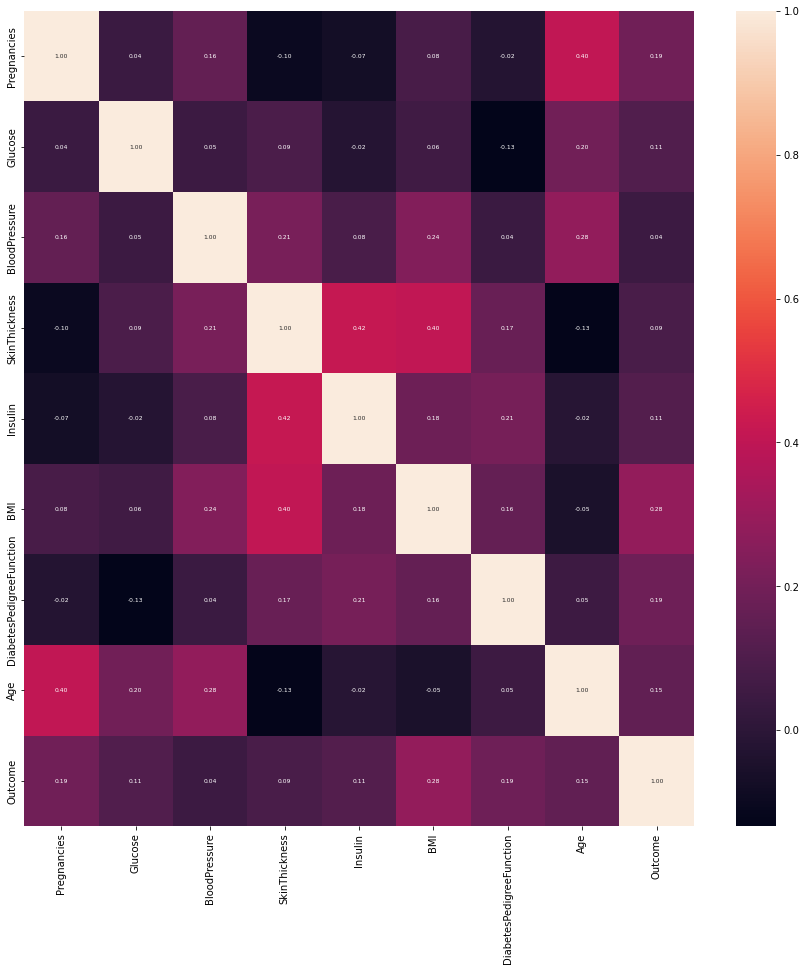

In [328]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"fontsize":6})
plt.show()

As we can see in correlation plot,the attributes that are close to outcome are:

1) BMI<br>
2) DiabetesPedigreeFunction<br>
3) Pregnancies<br>	

### Question 4)

We used the **hist** method to visualize the number of observations for the chosen attributes.

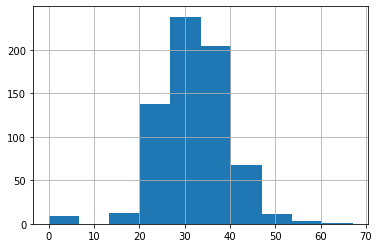

In [329]:
BMI_hist = df['BMI'].hist()

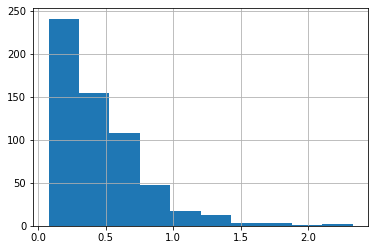

In [330]:
DiabetesPedigreeFunction_hist = df['DiabetesPedigreeFunction'].hist()

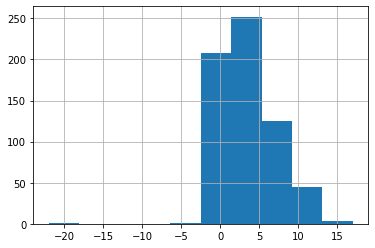

In [331]:
Pregnancies_hist = df['Pregnancies'].hist()

### Question 5)

First we use Scatter plot to study the chosen attributes from last part:<br>
Matplotlib scatter method is used to show the relationship between two variables as dots in two dimensions, one axis for each attribute.

In [332]:
def draw_scatter_plot(attribute, target):
    fig = plt.figure()
    plt.scatter(df[attribute], df[target], c = '#1691a7')
    plt.xlabel(attribute, fontsize = 12)
    plt.ylabel(target, fontsize = 12)
    plt.show()

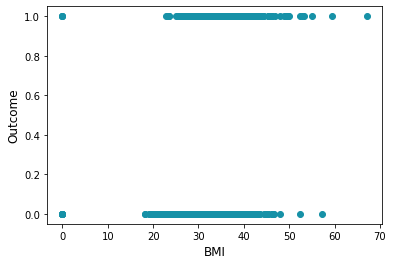

In [333]:
draw_scatter_plot('BMI','Outcome')

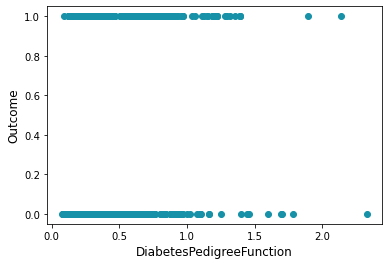

In [334]:
draw_scatter_plot('DiabetesPedigreeFunction','Outcome')

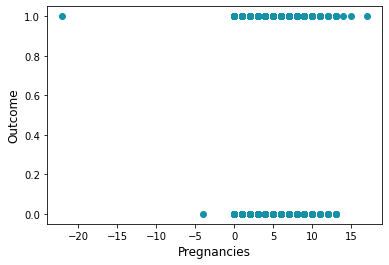

In [335]:
draw_scatter_plot('Pregnancies','Outcome')

Second, we used hexbin plots to visualize the relation between chosen attributes and the target

In [336]:
def hexbin_plot(attribute, target):
    plt.xlabel(attribute)
    plt.ylabel(target)
    plt.hexbin(df[attribute], df[target] , gridsize=(15,15),cmap=plt.cm.Greens )
    plt.show()

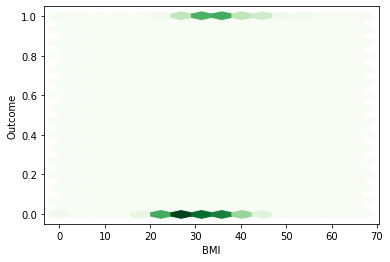

In [337]:
hexbin_plot('BMI','Outcome')

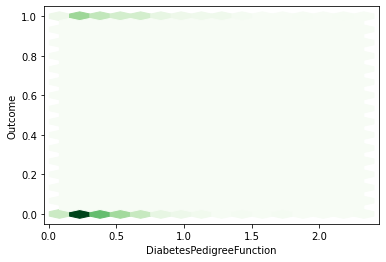

In [338]:
hexbin_plot('DiabetesPedigreeFunction','Outcome')

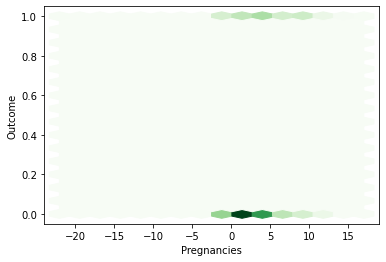

In [339]:
hexbin_plot('Pregnancies','Outcome')

### Question 6)

For extra study of our dataframe, we used Seaborn displot to visualizing the attributes contribution. <br>
Also we used stats.norm.fit() method to get mean and std of the column.<br>
But we can't use stats.norm.fit() on columns that have NaN value in them.

0.3489583333333333 0.47664076087820645


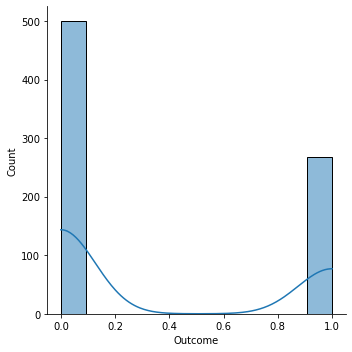

In [340]:
from scipy import stats
ax = sns.displot(df["Outcome"], kde = True)
mu, std = stats.norm.fit(df["Outcome"])
print(mu, std)

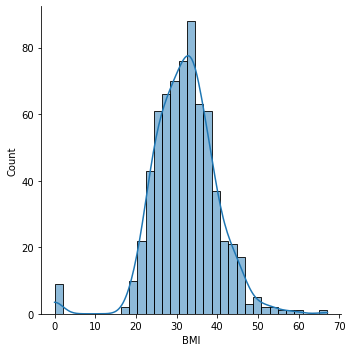

In [341]:
ax = sns.displot(df["BMI"], kde = True)

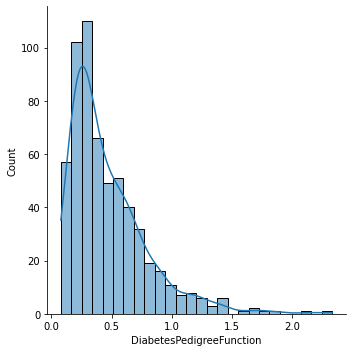

In [342]:
ax = sns.displot(df["DiabetesPedigreeFunction"], kde = True)

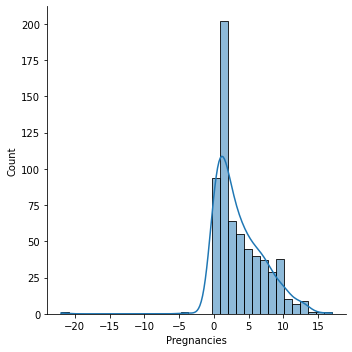

In [343]:
ax = sns.displot(df["Pregnancies"], kde = True)

# Part 2) Pre-Processing

### Question 1)

1) **Dropping columns**: In this approach, we drop the column with NaN values. We use this approach when number of NaN values are too many. If we drop a column that have many non-null elements, we just lost many useful data and informations.<br>
2) **Dropping rows**: In this approach, we drop the rows that have the NaN values. In this approach we may lose many useful data with dropping the rows.<br>
3) **Imputation NaN values with Mean/Median**: In this approach we impute mean of the colomn in the NaN values. This approach has a problem. If the type of column is object or we have categorical data, we can't use this approach to remove NaN values. Also in this approach, the mean of the colomn will be static but the contribution of element will change.<br>
4) **Imputation Nan values with random numbers**: In this approach we impute a random number in the Nan values. This approach is not suggested, because it will change the mean and the contribution of the colomn and beacause of that, our predection will be not accurate.<br>
5) **Using a model to fill missing values**: In this approach, we will use other available features to predict missing values.<br>
6) **Hybrid approach**: Using multiple approaches based on the column properties.<br>

### Question 2)

According to below result about number of NaN values in every column:<br>
**DiabetesPedigreeFunction** has the biggest number of NaN values. After that we have **SkinThickness**, **Pregnancies** and .... 

In [344]:
missing

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64

Here we showed the percentage of missing values in every column:

In [345]:
missing[missing.gt(0)] / df.shape[0] * 100

Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
dtype: float64

As we can see, the number of NaN values in every column are low and some of the column has useful information and data. If we use **Dropping columns or rows** method on useful columns, we lose many information from useful columns. Also there some columns that have low connection (according ot corroletion result) with outcome, so we can delete those columns in later approaches.<br>
Also the type of all columns are **float** or **int**. So using **imputation NaN with mean** is a good approach for this dataframe.

In [346]:
attributes = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for attribute in attributes:
    df[attribute] = df[attribute].fillna(df[attribute].mean())

Some columns have invalid values, for example in **Age** column we have a negetive value. But we know that age can't be negetive. So we delete invalid values in this section.

In [347]:
df = df[df['Pregnancies'] >= 0]
df = df[df['Glucose']>= 0]
df = df[df['Age'] >= 0 ]

### Question 3)

### Normalizing Data

**Standardization** is the process of rescaling the features so that they’ll have the properties of a Gaussian distribution that **mean** is 0 and **std** is 1.  

**Normalization** refers to rescaling real valued numeric attributes into the range 0 and 1.

The good point of these approaches is that they get all data to the same scale, This may improve learning and may have better effect on some optimization methods.For our dataframe that all its columns are **float** and **int** type, it is useful to use normalization.

In [348]:
df1 = df.copy()
df = (df - df.mean()) / df.std() 
df['Outcome'] = df['Outcome'].apply(lambda x: 0 if x <= 0 else 1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.743359,0.936930,0.167723,1.011958,-0.734066,0.205775,0.576473,1.516735,1
1,-0.899190,-1.175221,-0.157814,0.596001,-0.734066,-0.759838,-0.408934,-0.218446,0
2,-0.011955,2.110347,-0.266327,-1.414457,-0.734066,-1.215056,0.737137,-0.127121,1
3,-0.899190,-1.041117,-0.157814,0.180044,0.129595,-0.552921,-1.065871,-1.131699,0
4,-0.011955,0.568142,-1.568475,1.011958,0.809499,-0.003401,0.004067,-0.035796,1
...,...,...,...,...,...,...,...,...,...
763,2.057399,-0.638802,0.384748,1.913198,0.919753,0.109214,0.004067,2.703964,0
764,-0.570680,0.065248,0.059211,-0.001159,-0.734066,0.647198,-0.448207,-0.021434,0
765,0.414849,-0.222339,0.167723,0.180044,0.294977,-0.815016,-0.787387,-0.309772,0
766,-0.899190,0.199353,-0.483351,-0.001159,-0.734066,-0.277031,-0.416074,-0.021434,1


### Question 4)

### Categorical Features Handeling
1) **One-Hot encoding**: It creates another new feature column for each group.This approach addes more dimension to our feature data, for example if the initial column has lots of categories it will cause extreme dimensionality.<br>
2) **Number encoding**: this is almost the easiest way, we map each category to a number.<br>
3) **Target encoding**: in this approach we substitute each categorical feature with the grouped by average in the target variable, for example Outcome here.<br>
4) **Frequency encoding**: this approach replaces each category with its frequency.<br>

The Data Type of all columns of our dataframe is float or int, so we don't need above approaches for our dataframe.

### Question 5)

According to our knowledge of the dataframe, in each columns, the number of NaN values are low. If we drop some columns of dataframe, we will lose information for accurate prediction. Also some information have so low connection with outcome column, so we can delete some unnecessery columns that have low connection to outcome column from the dateframe.

### Question 6)
### Spliting Percentage

Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,
because there may be overfitting on train data.

In fact, there is not optimal split percentage in general.<br>
we must choose a split percentage that meets our project’s objectives with considerations that include:

- Computational cost in training the model.
- Computational cost in evaluating the model.
- Training set representativeness.
- Test set representativeness.

Nevertheless, common split percentages include:

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

we use first split percentage in our project.<br>

### Spliting Method

We use **random** method to form the **train** and the **test** data sets.Because it's not common that real world data is sorted in some manner. In general, splits are random. In fact, if we form the **train** and **test** data set from a sorted dataframe, the train set and test set will be biased and the train prediction will be so optimistic and overfitting will occur or our prediction will be so high and ideal. 

In [349]:
from sklearn.model_selection import train_test_split
x = df[df.columns.difference(["Outcome"])]
y = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Question 7)

The **validation set** is a set of data, separate from the training set, that is used to validate our model performance during training.

This validation process gives information that helps us tune the model’s hyperparameters and configurations accordingly. It is like a critic telling us whether the training is moving in the right direction or not.

The model is trained on the training set, and, simultaneously, the model evaluation is performed on the validation set after every epoch.

The main idea of splitting the dataset into a validation set is to prevent our model from overfitting

# Part 3) Training, Tuning and Evaluation 

### Question 1 & 2)

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [351]:
def confusion_matrix_table(y_test , y_pred):
    my_matrix = confusion_matrix(y_test, y_pred)
    print(my_matrix,'\n')
    print("True positive :",my_matrix[0][0])
    print("True negetive :",my_matrix[0][1])
    print("False positive :",my_matrix[1][0])
    print("False negetive :",my_matrix[1][1])
    print()

### Linear Regression

In [352]:
def run_logistic(x_train,y_train,x_test,y_test,parameters):
    logisticRegr = LogisticRegression(C = parameters['C'],penalty = parameters['penalty'])
    logisticRegr.fit(x_train, y_train)
    predictions = logisticRegr.predict(x_test)
    score = logisticRegr.score(x_test, y_test)
    print("test accuracy: ","{:.2f}".format(score * 100) ,"\n")
    confusion_matrix_table(y_test, predictions)

In [353]:
def run_logistic_gridCV(x_train,y_train,x_test,y_test):
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    logreg=LogisticRegression()
    logreg_cv=GridSearchCV(logreg,grid,cv=10)
    logreg_cv.fit(x_train,y_train)
    print("best parameters :",logreg_cv.best_params_)
    print("train accuracy :","{:.2f}".format(logreg_cv.best_score_ * 100))
    run_logistic(x_train,y_train,x_test,y_test,logreg_cv.best_params_)

In [354]:
run_logistic_gridCV(x_train,y_train,x_test,y_test)

best parameters : {'C': 0.1, 'penalty': 'l2'}
train accuracy : 74.95
test accuracy:  79.08 

[[97  3]
 [29 24]] 

True positive : 97
True negetive : 3
False positive : 29
False negetive : 24



### K-Nearst-Neighbors

In [355]:
def run_knn(x_train,y_train,x_test,y_test,n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    score = knn.score(x_test, y_test)
    print("test accuracy: ","{:.2f}".format(score * 100),"\n")
    confusion_matrix_table(y_test, predictions)

In [356]:
def run_knn_gridCV(x_train,y_train,x_test,y_test):
    knn = KNeighborsClassifier()
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
    grid_search=grid.fit(x_train, y_train)
    print("best parameters: ",grid_search.best_params_)
    print("train accuracy :","{:.2f}".format(grid_search.best_score_ *100))
    run_knn(x_train,y_train,x_test,y_test,grid_search.best_params_['n_neighbors'])

In [357]:
run_knn_gridCV(x_train,y_train,x_test,y_test)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
best parameters:  {'n_neighbors': 30}
train accuracy : 73.49
test accuracy:  74.51 

[[98  2]
 [37 16]] 

True positive : 98
True negetive : 2
False positive : 37
False negetive : 16



### Decision Tree

In [358]:
def run_decision_tree(x_train,y_train,x_test,y_test,parameters):
    decision_tree= DecisionTreeClassifier(ccp_alpha = parameters['ccp_alpha'], criterion=parameters['criterion'],
                                           max_depth=parameters['max_depth'], min_samples_leaf =parameters['min_samples_leaf'],
                                           min_samples_split = parameters['min_samples_split'] )
    decision_tree.fit(x_train, y_train)
    predictions = decision_tree.predict(x_test)
    score = decision_tree.score(x_test, y_test)
    print("test accuracy: ","{:.2f}".format(score * 100) ,"\n")
    confusion_matrix_table(y_test, predictions)

In [359]:
def run_decision_tree_girdCV(x_train,y_train,x_test,y_test):
    param_grid = {'ccp_alpha': [0.1, .01, .001],
                  'max_depth' : [1,2,3,4,5,6,7,8,9,10],'criterion' :['gini', 'entropy'],
                  'min_samples_leaf': [5,6,7,8,9,10,11,12,13,14,15], 'min_samples_split':[1,2,3,4,5,6]
                 }
    tree_clas = DecisionTreeClassifier(random_state=0)
    grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
    grid_search.fit(x_train, y_train)
    print("best parameters : ",grid_search.best_params_)
    print("train accuracy :","{:.2f}".format(grid_search.best_score_ * 100))
    run_decision_tree(x_train,y_train,x_test,y_test,grid_search.best_params_)

In [360]:
run_decision_tree_girdCV(x_train,y_train,x_test,y_test)

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits
best parameters :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 12, 'min_samples_split': 2}
train accuracy : 75.29
test accuracy:  76.47 

[[86 14]
 [22 31]] 

True positive : 86
True negetive : 14
False positive : 22
False negetive : 31



### Question 3)

### Overfitting
Overfitting occurs when our machine learning model tries to cover all the data points or more than the required data points present in the given dataset. Because of this, the model starts caching noise and inaccurate values present in the dataset, and all these factors reduce the efficiency and accuracy of the model. The overfitted model has low bias and high variance.
The chances of occurrence of overfitting increase as much we provide training to our model. It means the more we train our model, the more chances of occurring the overfitted model.

### Underfitting
Underfitting occurs when our machine learning model is not able to capture the underlying trend of the data. To avoid the overfitting in the model, the fed of training data can be stopped at an early stage, due to which the model may not learn enough from the training data. As a result, it may fail to find the best fit of the dominant trend in the data.
In the case of underfitting, the model is not able to learn enough from the training data, and hence it reduces the accuracy and produces unreliable predictions.
An underfitted model has high bias and low variance.

### Overfitting and Underfitting check
As we can see, the train accuracy is less than the test accuracy, so overfitting didn't accure. Also the train accuracy and test accuracy is high enough, so underfitting didn't accure either.

### Question 4)

In this part, we have changed some **pre-processing options**.<br>
According to **correlation heatmap**, the **SkinThickness** and **BloodPressure** attributes have much less effect on **outcome** result, so we removed these two columns from the dataframe.

In [361]:
del df1['SkinThickness']
del df1['BloodPressure']
df1

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,0.000000,33.600000,0.627000,50.000000,1
1,1.000000,85.000000,0.000000,26.600000,0.351000,31.000000,0
2,3.700787,183.000000,0.000000,23.300000,0.672000,32.000000,1
3,1.000000,89.000000,94.000000,28.100000,0.167000,21.000000,0
4,3.700787,137.000000,168.000000,32.083626,0.466676,33.000000,1
...,...,...,...,...,...,...,...
763,10.000000,101.000000,180.000000,32.900000,0.466676,63.000000,0
764,2.000000,122.000000,0.000000,36.800000,0.340000,33.157252,0
765,5.000000,113.422018,112.000000,26.200000,0.245000,30.000000,0
766,1.000000,126.000000,0.000000,30.100000,0.349000,33.157252,1


After removing the **SkinThickness** and **BloodPressure** columns, we normalize the dataframe.

In [362]:
df1 = (df1 - df1.mean()) / df1.std() 
df1['Outcome'] = df['Outcome'].apply(lambda x: 0 if x <= 0 else 1)
df1

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.743359,0.936930,-0.734066,0.205775,0.576473,1.516735,1
1,-0.899190,-1.175221,-0.734066,-0.759838,-0.408934,-0.218446,0
2,-0.011955,2.110347,-0.734066,-1.215056,0.737137,-0.127121,1
3,-0.899190,-1.041117,0.129595,-0.552921,-1.065871,-1.131699,0
4,-0.011955,0.568142,0.809499,-0.003401,0.004067,-0.035796,1
...,...,...,...,...,...,...,...
763,2.057399,-0.638802,0.919753,0.109214,0.004067,2.703964,0
764,-0.570680,0.065248,-0.734066,0.647198,-0.448207,-0.021434,0
765,0.414849,-0.222339,0.294977,-0.815016,-0.787387,-0.309772,0
766,-0.899190,0.199353,-0.734066,-0.277031,-0.416074,-0.021434,1


Also, I have changed **test_size** to 0.1 instead of 0.2 hoping for better result.

In [363]:
x = df1[df1.columns.difference(["Outcome"])]
y = df1["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

### Linear Regression (Rerun with New Df)

In [364]:
run_logistic_gridCV(x_train,y_train,x_test,y_test)

best parameters : {'C': 10.0, 'penalty': 'l2'}
train accuracy : 75.84
test accuracy:  81.82 

[[52  1]
 [13 11]] 

True positive : 52
True negetive : 1
False positive : 13
False negetive : 11



### K-Nearst-Neighbors (Rerun with New Df) 

In [365]:
run_knn_gridCV(x_train,y_train,x_test,y_test)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
best parameters:  {'n_neighbors': 17}
train accuracy : 74.82
test accuracy:  79.22 

[[51  2]
 [14 10]] 

True positive : 51
True negetive : 2
False positive : 14
False negetive : 10



### Decision Tree (Rerun with New Df) 

In [366]:
run_decision_tree_girdCV(x_train,y_train,x_test,y_test)

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits
best parameters :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 2}
train accuracy : 74.53
test accuracy:  79.22 

[[47  6]
 [10 14]] 

True positive : 47
True negetive : 6
False positive : 10
False negetive : 14



As we can see, the **accuracy** of results got better after changing some of **pre-processing options**.

# Part 4) Collective learning methods

In [367]:
from sklearn.ensemble import RandomForestClassifier

### Question 1)

In [368]:
def run_random_forest(x_train,y_train,x_test,y_test,parameters,print_confusion):
    random_forest = RandomForestClassifier(max_depth=parameters['max_depth'], random_state=10,
                                           criterion = parameters['criterion'],
                                          n_estimators = parameters['n_estimators'])
    random_forest.fit(x_train, y_train)
    predictions = random_forest.predict(x_test)
    score = random_forest.score(x_test, y_test)
    score = "{:.2f}".format(score * 100)
    if print_confusion:
        print("test accuracy: ",score,"\n")
        confusion_matrix_table(y_test, predictions)
    return score

In [369]:
def run_random_forest_gridCV(x_train,y_train,x_test,y_test,max_depth,n_estimator,print_confusion):
    rfc=RandomForestClassifier(random_state=0)
    param_grid = { 
    'n_estimators': n_estimator,
    'max_depth' : max_depth,
    'criterion' : ['gini']
    }
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(x_train, y_train)
    parameters = CV_rfc.best_params_
    if print_confusion:
        print("best parameters :",CV_rfc.best_params_)
        print("train accuracy :","{:.2f}".format(CV_rfc.best_score_ * 100))
    return run_random_forest(x_train,y_train,x_test,y_test,parameters,print_confusion)

In [370]:
run_random_forest_gridCV(x_train,y_train,x_test,y_test,[1,2,3,4,5,6,7,8,9,10],[55],True)

best parameters : {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 55}
train accuracy : 75.11
test accuracy:  84.42 

[[51  2]
 [10 14]] 

True positive : 51
True negetive : 2
False positive : 10
False negetive : 14



'84.42'

### Hyperparameters Analyze and Plotting

**max_depth**: max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 10 and plot the accuracy.

**n_estimators**: n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process. We fit random forest with n_estimator ranging from 1 to 70 and plot the accuracy.

In [371]:
def plot_maker(x_list,y_list,x_label,title): 
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylim([75, 85])
    ax.plot(x_list,y_list,label = 'accuracy')
    ax.grid(True , which = "both")
    ax.axhline(y = 0 , color = 'k')
    ax.axvline(x = 0 , color = 'k')
    ax.set_xlabel(x_label,fontsize = 16)
    ax.set_ylabel("accuracy",fontsize =16)
    ax.set_title(title,fontsize = 20)

In [372]:
max_depth = []
depth_changing_score = []
for i in range(10):
    max_depth.append(i+1)
    depth_changing_score.append(run_random_forest_gridCV(x_train,y_train,x_test,y_test,max_depth,[100],False))
depth_changing_score = list(map(float,depth_changing_score))
depth_changing_score

[76.62, 79.22, 77.92, 81.82, 81.82, 83.12, 83.12, 83.12, 83.12, 83.12]

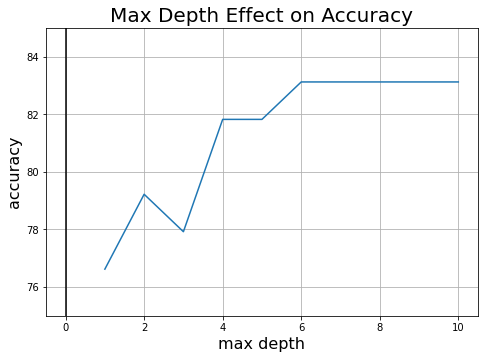

In [373]:
plot_maker(max_depth,depth_changing_score,'max depth','Max Depth Effect on Accuracy')

As we can see in plot above, After increasing **max depth** for decission tree, the accuracy increased and in depth = 6, the accuracy remains constant.

In [374]:
n_estimator = []
estimator_changing_score = []
for i in range(0,70,5):
    n_estimator.append(i+1)
    estimator_changing_score.append(run_random_forest_gridCV(x_train,y_train,x_test,y_test,max_depth,[i+1],False))
estimator_changing_score= list(map(float, estimator_changing_score))
estimator_changing_score

[76.62,
 75.32,
 80.52,
 80.52,
 80.52,
 80.52,
 84.42,
 83.12,
 84.42,
 84.42,
 84.42,
 81.82,
 84.42,
 84.42]

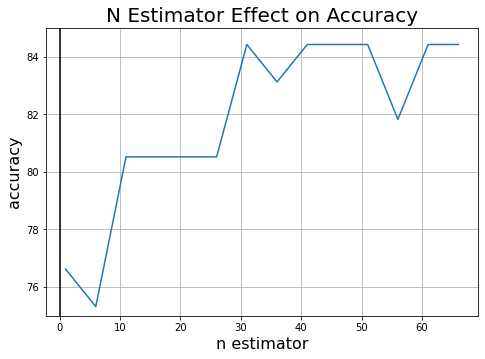

In [375]:
plot_maker(n_estimator,estimator_changing_score,'n estimator','N Estimator Effect on Accuracy')

As we can see in plot above, after increasing **n_estimator** for random forest, the accuracy increased.

### ًQuestion 2)

In [376]:
run_decision_tree_girdCV(x_train,y_train,x_test,y_test)

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits
best parameters :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 2}
train accuracy : 74.53
test accuracy:  79.22 

[[47  6]
 [10 14]] 

True positive : 47
True negetive : 6
False positive : 10
False negetive : 14



In [378]:
run_random_forest_gridCV(x_train,y_train,x_test,y_test,[1,2,3,4,5,6,7,8,9,10],[55],True)

best parameters : {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 55}
train accuracy : 75.11
test accuracy:  84.42 

[[51  2]
 [10 14]] 

True positive : 51
True negetive : 2
False positive : 10
False negetive : 14



'84.42'

#### Bias
Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.
#### Variance
Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.
#### Bias vs Variance
Bias and variance are inversely connected. It is impossible to have an ML model with a low bias and a low variance. When a data engineer modifies the ML algorithm to better fit a given data set, it will lead to low bias—but it will increase variance.
#### Random Forest and Decision tree comparison
Random Forest is a collection of multiple decision trees coupled parallelly.
Decision tree itself has low bias and high variance i.e it will completely fit the training data(low bias) but if a new test points come the error goes high(high variance). But when multiple decision trees are coupled with row and column sampling the combined variance offered by this collection is low. Hence Random forest is low bias and low variance model.
#### Result
As we can see in Random Forest and Decision Tree results, the accuracy of Random Forest is higher than Decision tree accruacy. It means that Random Forest has lower variance than Dicision Tree, so the result is supporting our claims.